In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir('C:/Users/farav/OneDrive/Documentos/Python Scripts')

In [3]:
base_gral_senti_fecha = pd.read_csv('base_tit_senti_fecha.csv', encoding='iso8859_2')
base_gral_senti_fecha.head()

,titular,fecha,diario,sentimiento
0,"""Mirá la ceremonia de inauguración de los Jueg...",2021-07-23,elobse,NEU
1,"""El contrasentido del clásico: Peńarol perdió ...",2021-07-23,elobse,NEU
2,"""Los sueldos de $ 200.000 en el Directorio de ...",2021-07-23,elobse,NEU
3,"""żDónde se podrán ver los Juegos Olímpicos de ...",2021-07-23,elobse,NEU
4,"""Crece interés de argentinos por Montevideo: c...",2021-07-23,elobse,POS


In [4]:
base_gral_senti_fecha['fecha'] = pd.to_datetime(base_gral_senti_fecha['fecha'])
base_gral_senti_fecha.dtypes
base_gral_senti_fecha.sort_values(by='fecha')

,titular,fecha,diario,sentimiento
83331,"""Teatro al día""",2021-07-22,republ,NEU
83348,se manifiesta contra la pérdida de trabajo ...,2021-07-22,republ,NEG
83349,"""Variante Delta: Pfizer tienen un 88% de efect...",2021-07-22,republ,NEU
83350,"""La ciudad australiana Brisbane será sede de l...",2021-07-22,republ,NEU
83351,"""Víctimas de derrumbe en Miami recibirán indem...",2021-07-22,republ,NEU
...,...,...,...,...
17432,"""żPor qué no jugó Diego Godín en Vélez el part...",2022-07-19,elobse,NEU
17431,"""Canal 10 no emitió el programa Vivila otra ve...",2022-07-19,elobse,NEU
17430,"""Interior investiga cómo se viralizaron los vi...",2022-07-19,elobse,NEU
37486,"""Cardellino en el Sodre: suspenden shows tras ...",2022-07-19,elpais,NEU


In [5]:
mask = (base_gral_senti_fecha['fecha'] > '2021-07-22') & (base_gral_senti_fecha['fecha'] <= '2021-08-22')
filtered_fecha_base_gral=base_gral_senti_fecha.loc[mask]

In [6]:
import seaborn as sns

<AxesSubplot:xlabel='diario', ylabel='sentimiento'>

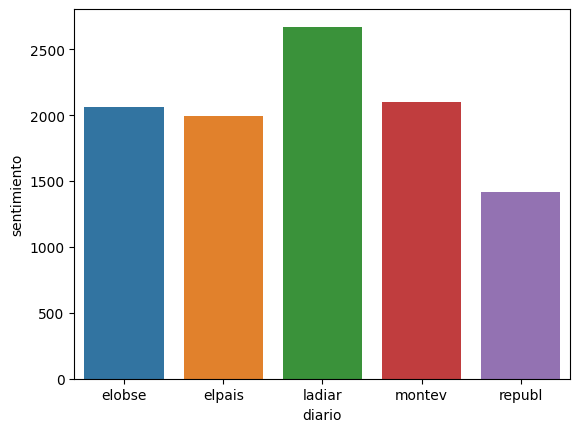

In [7]:
grafico = filtered_fecha_base_gral[['sentimiento','diario']].groupby('diario').count()
grafico = grafico.reset_index()
sns.barplot(x='diario', y='sentimiento', data=grafico)

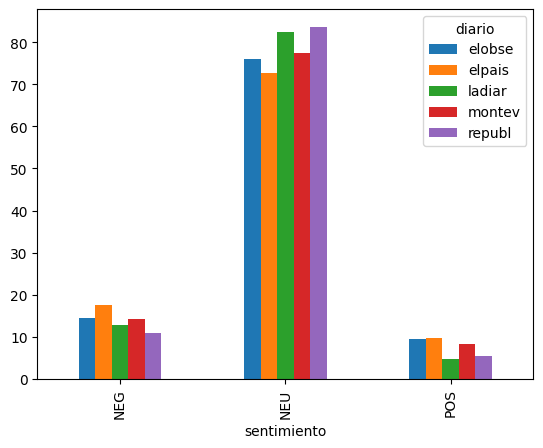

In [8]:
plot = pd.crosstab(index=filtered_fecha_base_gral['sentimiento'],
            columns=base_gral_senti_fecha['diario']).apply(lambda r: r/r.sum() *100,
                                              axis=0).plot(kind='bar')

In [9]:
tabla_datos = pd.crosstab(index=filtered_fecha_base_gral['sentimiento'], \
                          columns=base_gral_senti_fecha['diario'])
# si saco margins=True me da solo los valores
tabla_datos

diario,elobse,elpais,ladiar,montev,republ
sentimiento,,,,,
NEG,298,351,340,298,154
NEU,1571,1450,2205,1625,1183
POS,195,192,127,175,77


In [10]:
!python -m pip install nltk

In [ ]:
!python -m nltk.downloader all

In [12]:
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output

In [13]:
filtered_fecha_elpais = filtered_fecha_base_gral[filtered_fecha_base_gral['diario'] == 'elpais']

In [15]:
filtered_fecha_elpais = filtered_fecha_elpais[['titular', 'sentimiento']]

filtered_fecha_elpais_pos = filtered_fecha_elpais[filtered_fecha_elpais['sentimiento'] == 'POS']
filtered_fecha_elpais_pos = filtered_fecha_elpais['titular']
filtered_fecha_elpais_neg = filtered_fecha_elpais[filtered_fecha_elpais['sentimiento'] == 'NEG']
filtered_fecha_elpais_neg = filtered_fecha_elpais['titular']
filtered_fecha_elpais_neu = filtered_fecha_elpais[filtered_fecha_elpais['sentimiento'] == 'NEU']
filtered_fecha_elpais_neu = filtered_fecha_elpais['titular']

Palabras positivas


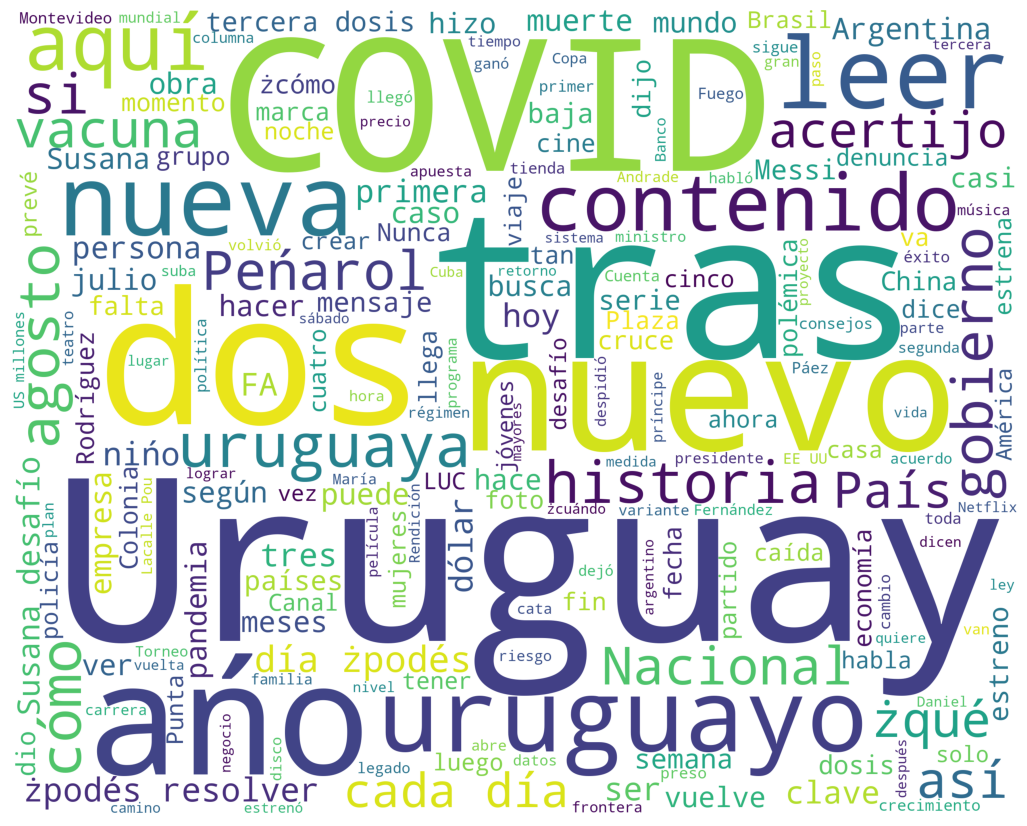

Palabras negativas


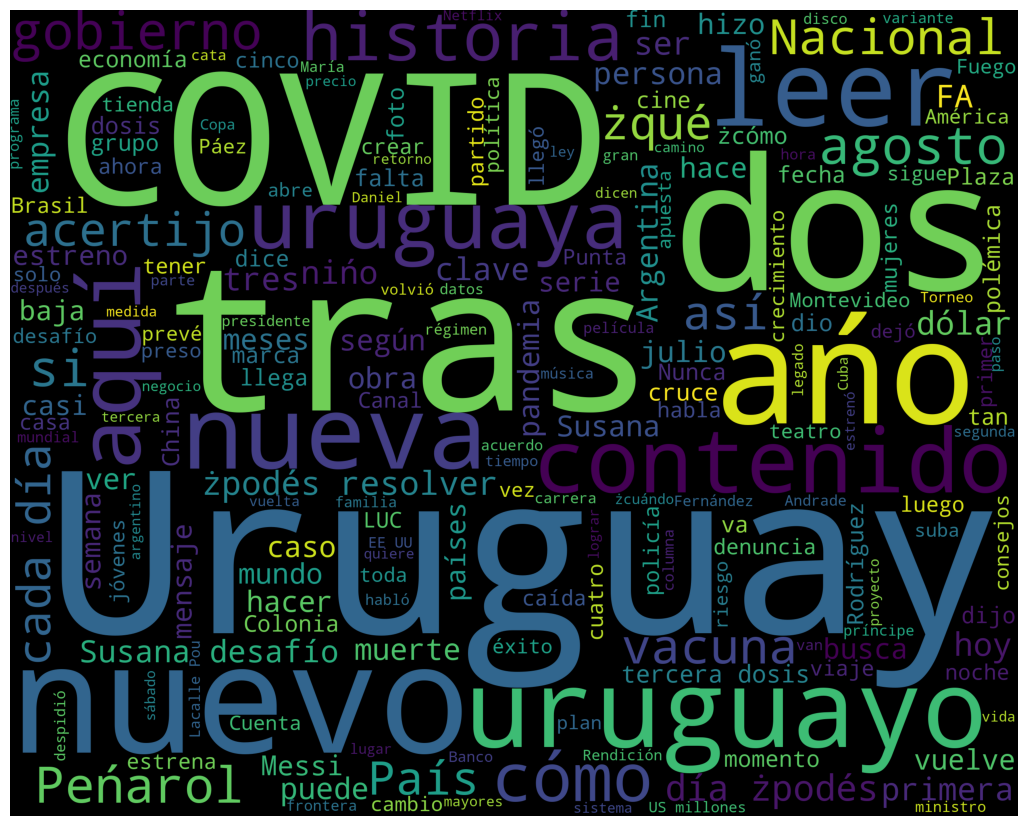

Palabras neutras black


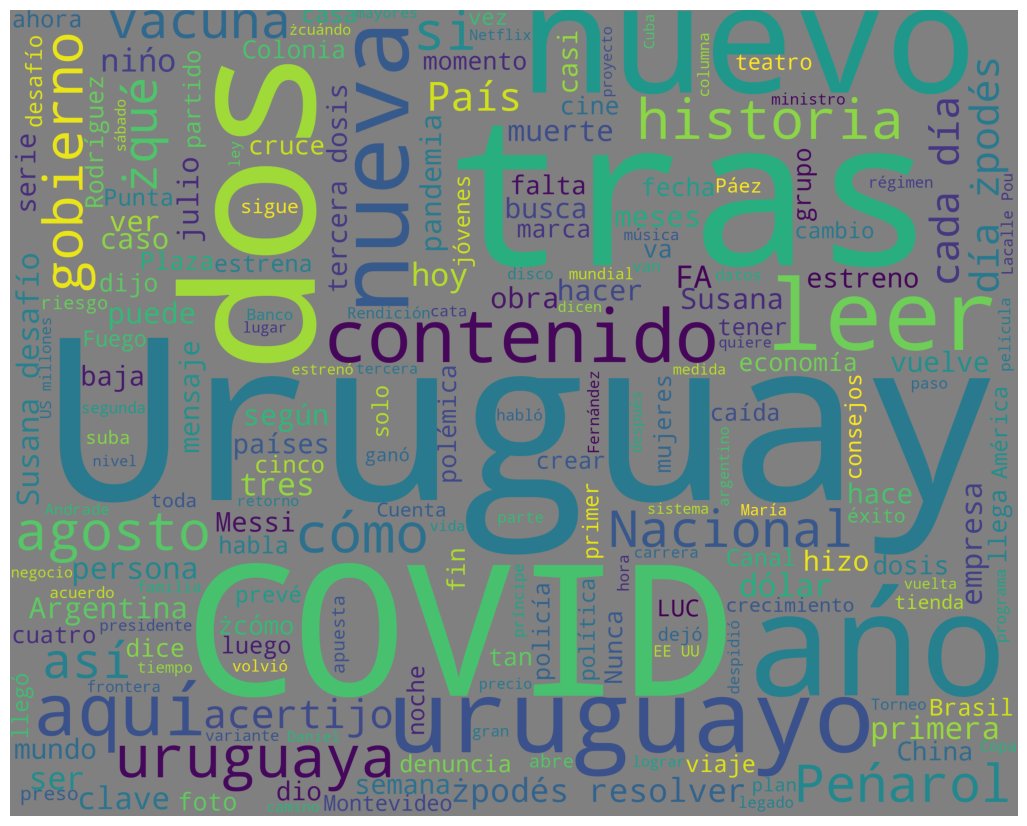

In [16]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    ''' Limpio el texto eliminando hashtags, menciones, links y retweets.
    '''
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('¿')
                                and not word.startswith('¡')
                                and not word.startswith('"')
                                and not word.endswith('?')
                                and not word.endswith('!')
                                and not word.endswith('"')
                                and word != '$'
                            ])
    wordcloud = WordCloud(stopwords=stopwords.words("spanish"),
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Palabras positivas")
wordcloud_draw(filtered_fecha_elpais_pos,'white')
print("Palabras negativas")
wordcloud_draw(filtered_fecha_elpais_neg)
print('Palabras neutras', 'black')
wordcloud_draw(filtered_fecha_elpais_neu, 'grey')